In [5]:
import pandas as pd
import numpy as np

In [21]:
oneday=pd.read_csv('input/oneyear2.csv')

In [22]:
oneday.tail()

,Unnamed: 0,MTS,VOLUME,OPEN2,OPEN3,OPEN4,OPEN5,OPEN6,OPEN7,OPEN8,OPEN1
395,4,2017-12-14 16:00:00,63123.657646,16176.0,16968.0,16753.0,14939.0,14679.0,15843.0,16608.0,16384.0
396,3,2017-12-15 16:00:00,48267.950664,16384.0,16176.0,16968.0,16753.0,14939.0,14679.0,15843.0,17569.0
397,2,2017-12-16 16:00:00,51803.972129,17569.0,16384.0,16176.0,16968.0,16753.0,14939.0,14679.0,19209.0
398,1,2017-12-17 16:00:00,53568.532997,19209.0,17569.0,16384.0,16176.0,16968.0,16753.0,14939.0,18956.0
399,0,2017-12-18 16:00:00,1522.469418,18956.0,19209.0,17569.0,16384.0,16176.0,16968.0,16753.0,18924.0


In [23]:
train=oneday.values[10:350]
test=oneday.values[350:390]

In [24]:
train_X=train[:,2:10]
test_X=test[:,2:10]

In [25]:
train_Y=train[:,10]
test_Y=test[:,10]

In [26]:
train_X=train_X.reshape(-1,8,1)
train_Y=train_Y.reshape(-1,1)

In [27]:
test_X=test_X.reshape(-1,8,1)
test_Y=test_Y.reshape(-1,1)

In [28]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import warnings
import keras
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [30]:
np.set_printoptions(threshold=np.nan)

In [43]:
def LSTM8():
    model = Sequential()
    # model.add(LSTM(units=4,input_shape=(input_dim,step)))
    model.add(LSTM(
            16,input_dim=1,input_length=8,stateful=False,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
            32,stateful=False,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(16,kernel_initializer="uniform",activation='softmax')) 
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [44]:
model=LSTM8()
model.fit(train_X,train_Y,batch_size=32,epochs=1000,validation_split=0.1,verbose=1)

/Users/xiangyuanren/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/Users/xiangyuanren/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, stateful=False, return_sequences=True, input_shape=(8, 1))`
  """


Train on 306 samples, validate on 34 samples
Epoch 1/1000
306/306 [==============================] - 0s 191us/step - loss: 5132160.4346 - val_loss: 26751932.2353
Epoch 2/1000
306/306 [==============================] - 0s 196us/step - loss: 5132029.5915 - val_loss: 26751522.1176
Epoch 3/1000
306/306 [==============================] - 0s 178us/step - loss: 5131840.2418 - val_loss: 26750883.7647
Epoch 4/1000
306/306 [==============================] - 0s 185us/step - loss: 5131537.4869 - val_loss: 26749932.4706
Epoch 5/1000
306/306 [==============================] - 0s 188us/step - loss: 5131166.2026 - val_loss: 26748908.2353
Epoch 6/1000
306/306 [==============================] - 0s 181us/step - loss: 5130768.6176 - val_loss: 26747831.5294
Epoch 7/1000
306/306 [==============================] - 0s 181us/step - loss: 5130366.4510 - val_loss: 26746831.5294
Epoch 8/1000
306/306 [==============================] - 0s 190us/step - loss: 5130005.9935 - val_loss: 26745946.8235
Epoch 9/1000
306/30

306/306 [==============================] - 0s 182us/step - loss: 5124195.6536 - val_loss: 26731065.1765
Epoch 71/1000
306/306 [==============================] - 0s 225us/step - loss: 5124113.5163 - val_loss: 26730861.1765
Epoch 72/1000
306/306 [==============================] - 0s 224us/step - loss: 5124036.5817 - val_loss: 26730644.9412
Epoch 73/1000
306/306 [==============================] - 0s 195us/step - loss: 5123955.9412 - val_loss: 26730440.9412
Epoch 74/1000
306/306 [==============================] - 0s 195us/step - loss: 5123876.1209 - val_loss: 26730235.0588
Epoch 75/1000
306/306 [==============================] - 0s 195us/step - loss: 5123797.1373 - val_loss: 26730026.8235
Epoch 76/1000
306/306 [==============================] - 0s 190us/step - loss: 5123719.0703 - val_loss: 26729816.7059
Epoch 77/1000
306/306 [==============================] - 0s 187us/step - loss: 5123639.3938 - val_loss: 26729610.8235
Epoch 78/1000
306/306 [==============================] - 0s 181us/step

306/306 [==============================] - 0s 174us/step - loss: 5118775.9771 - val_loss: 26716829.6471
Epoch 140/1000
306/306 [==============================] - 0s 175us/step - loss: 5118698.7974 - val_loss: 26716619.7647
Epoch 141/1000
306/306 [==============================] - 0s 177us/step - loss: 5118619.8709 - val_loss: 26716413.6471
Epoch 142/1000
306/306 [==============================] - 0s 274us/step - loss: 5118541.7516 - val_loss: 26716213.6471
Epoch 143/1000
306/306 [==============================] - 0s 223us/step - loss: 5118464.7255 - val_loss: 26716003.5294
Epoch 144/1000
306/306 [==============================] - 0s 237us/step - loss: 5118385.0850 - val_loss: 26715799.5294
Epoch 145/1000
306/306 [==============================] - 0s 192us/step - loss: 5118307.5523 - val_loss: 26715593.6471
Epoch 146/1000
306/306 [==============================] - 0s 189us/step - loss: 5118228.8660 - val_loss: 26715389.4118
Epoch 147/1000
306/306 [==============================] - 0s 18

Epoch 208/1000
306/306 [==============================] - 0s 180us/step - loss: 5113408.5686 - val_loss: 26702711.5294
Epoch 209/1000
306/306 [==============================] - 0s 176us/step - loss: 5113331.1373 - val_loss: 26702505.4118
Epoch 210/1000
306/306 [==============================] - 0s 180us/step - loss: 5113253.8137 - val_loss: 26702305.4118
Epoch 211/1000
306/306 [==============================] - 0s 187us/step - loss: 5113175.4346 - val_loss: 26702105.4118
Epoch 212/1000
306/306 [==============================] - 0s 185us/step - loss: 5113099.0392 - val_loss: 26701895.5294
Epoch 213/1000
306/306 [==============================] - 0s 180us/step - loss: 5113020.7451 - val_loss: 26701687.2941
Epoch 214/1000
306/306 [==============================] - 0s 188us/step - loss: 5112942.1569 - val_loss: 26701481.4118
Epoch 215/1000
306/306 [==============================] - 0s 186us/step - loss: 5112864.0359 - val_loss: 26701281.4118
Epoch 216/1000
306/306 [========================

Epoch 277/1000
306/306 [==============================] - 0s 180us/step - loss: 5108056.5131 - val_loss: 26688631.7647
Epoch 278/1000
306/306 [==============================] - 0s 193us/step - loss: 5107978.7157 - val_loss: 26688425.6471
Epoch 279/1000
306/306 [==============================] - 0s 200us/step - loss: 5107902.0441 - val_loss: 26688221.6471
Epoch 280/1000
306/306 [==============================] - 0s 191us/step - loss: 5107824.4542 - val_loss: 26688017.4118
Epoch 281/1000
306/306 [==============================] - 0s 184us/step - loss: 5107746.8562 - val_loss: 26687811.7647
Epoch 282/1000
306/306 [==============================] - 0s 186us/step - loss: 5107669.2810 - val_loss: 26687611.7647
Epoch 283/1000
306/306 [==============================] - 0s 190us/step - loss: 5107592.8529 - val_loss: 26687411.7647
Epoch 284/1000
306/306 [==============================] - 0s 191us/step - loss: 5107515.5261 - val_loss: 26687201.6471
Epoch 285/1000
306/306 [========================

Epoch 346/1000
306/306 [==============================] - 0s 185us/step - loss: 5102722.6029 - val_loss: 26674590.1176
Epoch 347/1000
306/306 [==============================] - 0s 194us/step - loss: 5102645.2729 - val_loss: 26674382.1176
Epoch 348/1000
306/306 [==============================] - 0s 190us/step - loss: 5102567.9020 - val_loss: 26674182.1176
Epoch 349/1000
306/306 [==============================] - 0s 183us/step - loss: 5102490.9771 - val_loss: 26673982.1176
Epoch 350/1000
306/306 [==============================] - 0s 188us/step - loss: 5102414.9346 - val_loss: 26673782.1176
Epoch 351/1000
306/306 [==============================] - 0s 179us/step - loss: 5102337.4673 - val_loss: 26673572.2353
Epoch 352/1000
306/306 [==============================] - 0s 185us/step - loss: 5102260.0359 - val_loss: 26673368.0000
Epoch 353/1000
306/306 [==============================] - 0s 194us/step - loss: 5102181.7451 - val_loss: 26673162.1176
Epoch 354/1000
306/306 [========================

Epoch 415/1000
306/306 [==============================] - 0s 229us/step - loss: 5097389.1503 - val_loss: 26660544.4706
Epoch 416/1000
306/306 [==============================] - 0s 209us/step - loss: 5097312.5131 - val_loss: 26660338.5882
Epoch 417/1000
306/306 [==============================] - 0s 199us/step - loss: 5097235.1634 - val_loss: 26660140.4706
Epoch 418/1000
306/306 [==============================] - 0s 210us/step - loss: 5097157.9706 - val_loss: 26659930.3529
Epoch 419/1000
306/306 [==============================] - 0s 199us/step - loss: 5097079.6732 - val_loss: 26659730.3529
Epoch 420/1000
306/306 [==============================] - 0s 187us/step - loss: 5097002.8464 - val_loss: 26659526.3529
Epoch 421/1000
306/306 [==============================] - 0s 182us/step - loss: 5096924.5719 - val_loss: 26659320.4706
Epoch 422/1000
306/306 [==============================] - 0s 188us/step - loss: 5096847.8562 - val_loss: 26659120.4706
Epoch 423/1000
306/306 [========================

Epoch 484/1000
306/306 [==============================] - 0s 231us/step - loss: 5092069.5033 - val_loss: 26646525.1765
Epoch 485/1000
306/306 [==============================] - 0s 220us/step - loss: 5091991.3399 - val_loss: 26646325.1765
Epoch 486/1000
306/306 [==============================] - 0s 212us/step - loss: 5091914.8072 - val_loss: 26646121.1765
Epoch 487/1000
306/306 [==============================] - 0s 219us/step - loss: 5091837.1846 - val_loss: 26645921.1765
Epoch 488/1000
306/306 [==============================] - 0s 217us/step - loss: 5091761.4869 - val_loss: 26645717.1765
Epoch 489/1000
306/306 [==============================] - 0s 199us/step - loss: 5091684.8660 - val_loss: 26645513.1765
Epoch 490/1000
306/306 [==============================] - 0s 200us/step - loss: 5091607.5327 - val_loss: 26645307.2941
Epoch 491/1000
306/306 [==============================] - 0s 186us/step - loss: 5091530.9346 - val_loss: 26645109.1765
Epoch 492/1000
306/306 [========================

Epoch 553/1000
306/306 [==============================] - 0s 196us/step - loss: 5086746.3268 - val_loss: 26632501.6471
Epoch 554/1000
306/306 [==============================] - 0s 186us/step - loss: 5086670.2124 - val_loss: 26632297.6471
Epoch 555/1000
306/306 [==============================] - 0s 182us/step - loss: 5086592.5000 - val_loss: 26632091.7647
Epoch 556/1000
306/306 [==============================] - 0s 197us/step - loss: 5086513.9837 - val_loss: 26631891.7647
Epoch 557/1000
306/306 [==============================] - 0s 197us/step - loss: 5086439.3922 - val_loss: 26631687.7647
Epoch 558/1000
306/306 [==============================] - 0s 201us/step - loss: 5086360.5065 - val_loss: 26631483.7647
Epoch 559/1000
306/306 [==============================] - 0s 186us/step - loss: 5086284.2288 - val_loss: 26631273.6471
Epoch 560/1000
306/306 [==============================] - 0s 180us/step - loss: 5086205.7810 - val_loss: 26631073.6471
Epoch 561/1000
306/306 [========================

Epoch 622/1000
306/306 [==============================] - 0s 174us/step - loss: 5081431.4641 - val_loss: 26618480.2353
Epoch 623/1000
306/306 [==============================] - 0s 170us/step - loss: 5081355.0065 - val_loss: 26618282.3529
Epoch 624/1000
306/306 [==============================] - 0s 175us/step - loss: 5081276.2026 - val_loss: 26618082.3529
Epoch 625/1000
306/306 [==============================] - 0s 197us/step - loss: 5081200.7010 - val_loss: 26617872.2353
Epoch 626/1000
306/306 [==============================] - 0s 220us/step - loss: 5081122.9967 - val_loss: 26617672.4706
Epoch 627/1000
306/306 [==============================] - 0s 210us/step - loss: 5081044.9739 - val_loss: 26617472.4706
Epoch 628/1000
306/306 [==============================] - 0s 193us/step - loss: 5080969.3497 - val_loss: 26617264.2353
Epoch 629/1000
306/306 [==============================] - 0s 188us/step - loss: 5080892.0507 - val_loss: 26617064.2353
Epoch 630/1000
306/306 [========================

Epoch 691/1000
306/306 [==============================] - 0s 180us/step - loss: 5076122.4739 - val_loss: 26604479.0588
Epoch 692/1000
306/306 [==============================] - 0s 175us/step - loss: 5076045.4575 - val_loss: 26604275.0588
Epoch 693/1000
306/306 [==============================] - 0s 182us/step - loss: 5075968.0588 - val_loss: 26604075.0588
Epoch 694/1000
306/306 [==============================] - 0s 187us/step - loss: 5075892.5621 - val_loss: 26603866.8235
Epoch 695/1000
306/306 [==============================] - 0s 185us/step - loss: 5075814.2778 - val_loss: 26603666.8235
Epoch 696/1000
306/306 [==============================] - 0s 175us/step - loss: 5075736.8203 - val_loss: 26603466.8235
Epoch 697/1000
306/306 [==============================] - 0s 181us/step - loss: 5075660.6993 - val_loss: 26603256.9412
Epoch 698/1000
306/306 [==============================] - 0s 191us/step - loss: 5075583.4379 - val_loss: 26603056.9412
Epoch 699/1000
306/306 [========================

Epoch 760/1000
306/306 [==============================] - 0s 201us/step - loss: 5070816.9052 - val_loss: 26590475.7647
Epoch 761/1000
306/306 [==============================] - 0s 183us/step - loss: 5070739.7337 - val_loss: 26590271.5294
Epoch 762/1000
306/306 [==============================] - 0s 188us/step - loss: 5070663.7712 - val_loss: 26590071.5294
Epoch 763/1000
306/306 [==============================] - 0s 192us/step - loss: 5070586.7843 - val_loss: 26589873.6471
Epoch 764/1000
306/306 [==============================] - 0s 193us/step - loss: 5070510.8137 - val_loss: 26589663.5294
Epoch 765/1000
306/306 [==============================] - 0s 180us/step - loss: 5070432.3366 - val_loss: 26589463.5294
Epoch 766/1000
306/306 [==============================] - 0s 198us/step - loss: 5070356.7124 - val_loss: 26589255.5294
Epoch 767/1000
306/306 [==============================] - 0s 191us/step - loss: 5070278.8709 - val_loss: 26589055.5294
Epoch 768/1000
306/306 [========================

Epoch 829/1000
306/306 [==============================] - 0s 182us/step - loss: 5065517.4281 - val_loss: 26576482.3529
Epoch 830/1000
306/306 [==============================] - 0s 188us/step - loss: 5065440.2484 - val_loss: 26576278.3529
Epoch 831/1000
306/306 [==============================] - 0s 181us/step - loss: 5065363.3889 - val_loss: 26576072.2353
Epoch 832/1000
306/306 [==============================] - 0s 183us/step - loss: 5065286.3660 - val_loss: 26575874.1176
Epoch 833/1000
306/306 [==============================] - 0s 191us/step - loss: 5065209.9853 - val_loss: 26575668.2353
Epoch 834/1000
306/306 [==============================] - 0s 196us/step - loss: 5065132.0882 - val_loss: 26575464.2353
Epoch 835/1000
306/306 [==============================] - 0s 239us/step - loss: 5065056.1111 - val_loss: 26575266.1176
Epoch 836/1000
306/306 [==============================] - 0s 226us/step - loss: 5064980.3333 - val_loss: 26575060.2353
Epoch 837/1000
306/306 [========================

Epoch 898/1000
306/306 [==============================] - 0s 176us/step - loss: 5060214.5588 - val_loss: 26562476.7059
Epoch 899/1000
306/306 [==============================] - 0s 179us/step - loss: 5060138.4444 - val_loss: 26562276.7059
Epoch 900/1000
306/306 [==============================] - 0s 190us/step - loss: 5060060.8922 - val_loss: 26562072.9412
Epoch 901/1000
306/306 [==============================] - 0s 192us/step - loss: 5059986.4902 - val_loss: 26561868.7059
Epoch 902/1000
306/306 [==============================] - 0s 184us/step - loss: 5059908.2190 - val_loss: 26561664.7059
Epoch 903/1000
306/306 [==============================] - 0s 186us/step - loss: 5059832.3529 - val_loss: 26561458.8235
Epoch 904/1000
306/306 [==============================] - 0s 190us/step - loss: 5059754.4346 - val_loss: 26561260.7059
Epoch 905/1000
306/306 [==============================] - 0s 191us/step - loss: 5059677.5065 - val_loss: 26561056.7059
Epoch 906/1000
306/306 [========================

Epoch 967/1000
306/306 [==============================] - 0s 183us/step - loss: 5054921.0490 - val_loss: 26548483.5294
Epoch 968/1000
306/306 [==============================] - 0s 189us/step - loss: 5054843.0980 - val_loss: 26548285.6471
Epoch 969/1000
306/306 [==============================] - 0s 195us/step - loss: 5054767.6438 - val_loss: 26548081.4118
Epoch 970/1000
306/306 [==============================] - 0s 188us/step - loss: 5054692.4641 - val_loss: 26547877.4118
Epoch 971/1000
306/306 [==============================] - 0s 189us/step - loss: 5054614.8268 - val_loss: 26547677.4118
Epoch 972/1000
306/306 [==============================] - 0s 212us/step - loss: 5054537.5654 - val_loss: 26547473.4118
Epoch 973/1000
306/306 [==============================] - 0s 200us/step - loss: 5054461.5458 - val_loss: 26547269.4118
Epoch 974/1000
306/306 [==============================] - 0s 190us/step - loss: 5054384.9641 - val_loss: 26547069.4118
Epoch 975/1000
306/306 [========================

In [45]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

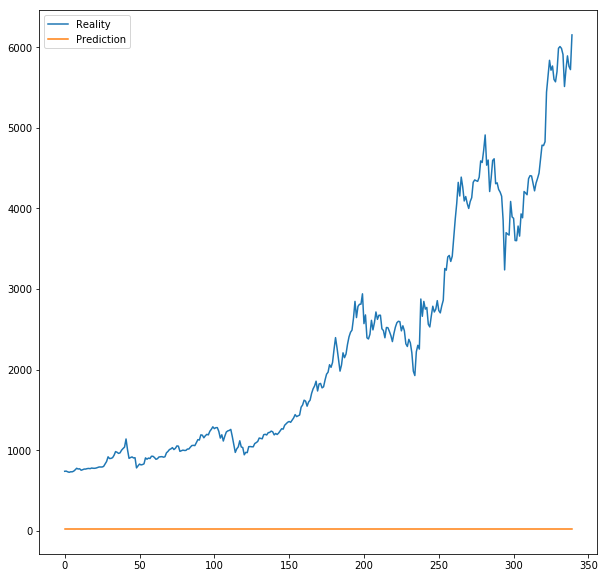

In [46]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(train_Y[:])
l2,=plt.plot(trainPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

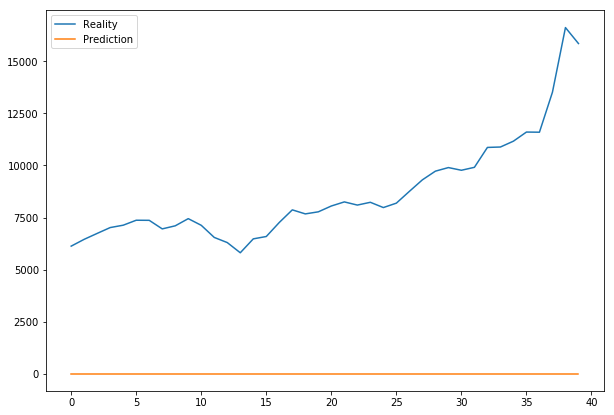

In [47]:

plt.figure(figsize=(10,7)) 
l1,=plt.plot(test_Y[:])
l2,=plt.plot(testPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

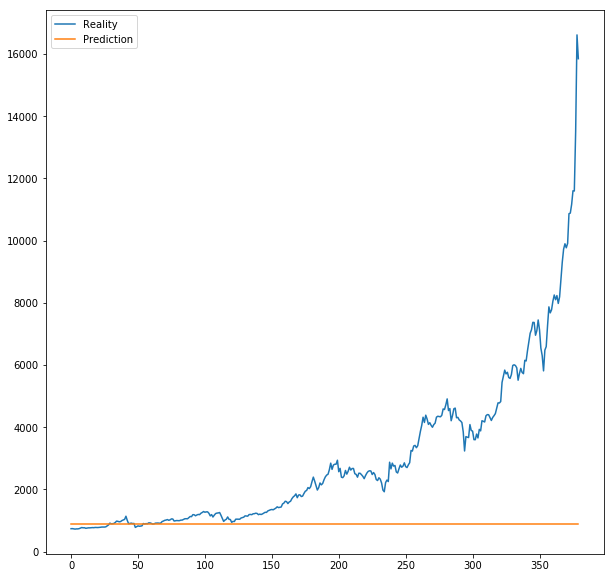

In [38]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(np.concatenate((train_Y,test_Y),axis=0))
l2,=plt.plot(np.concatenate((trainPredict,testPredict),axis=0))
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

In [52]:
import math
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.17 RMSE
